# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metrics"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15 # Convert from Kelvin to Celsius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp, # In Celsius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mukalla
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | cidade velha
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | maralal
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | queenstown
Processing Record 17 of Set 1 | mont-dore
Processing Record 18 of Set 1 | naukot
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | port glaud
City not found. 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mukalla,14.5425,49.1242,28.71,73,77,3.15,YE,1724902737
1,port lincoln,-34.7333,135.8667,21.39,50,0,9.29,AU,1724902738
2,cidade velha,14.9167,-23.6167,26.26,83,20,1.54,CV,1724902739
3,puerto natales,-51.7236,-72.4875,2.85,87,33,3.35,CL,1724902740
4,weno,7.4515,151.8468,28.97,84,100,2.06,FM,1724902742


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mukalla,14.5425,49.1242,28.71,73,77,3.15,YE,1724902737
1,port lincoln,-34.7333,135.8667,21.39,50,0,9.29,AU,1724902738
2,cidade velha,14.9167,-23.6167,26.26,83,20,1.54,CV,1724902739
3,puerto natales,-51.7236,-72.4875,2.85,87,33,3.35,CL,1724902740
4,weno,7.4515,151.8468,28.97,84,100,2.06,FM,1724902742


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

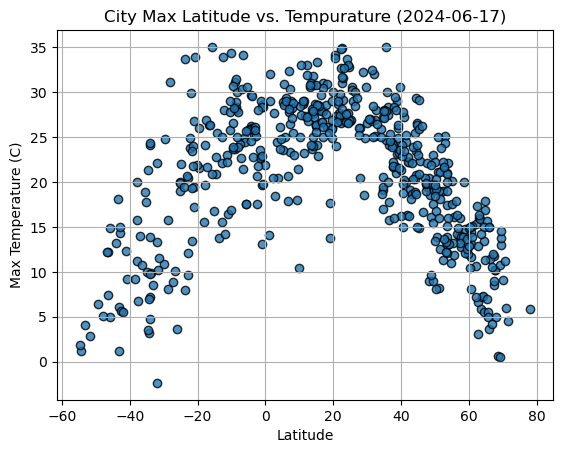

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempurature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

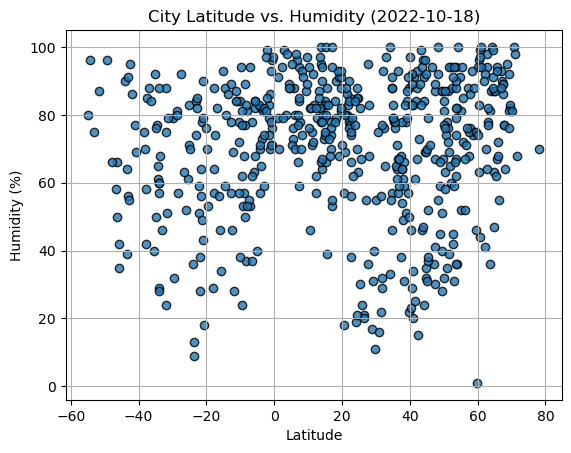

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

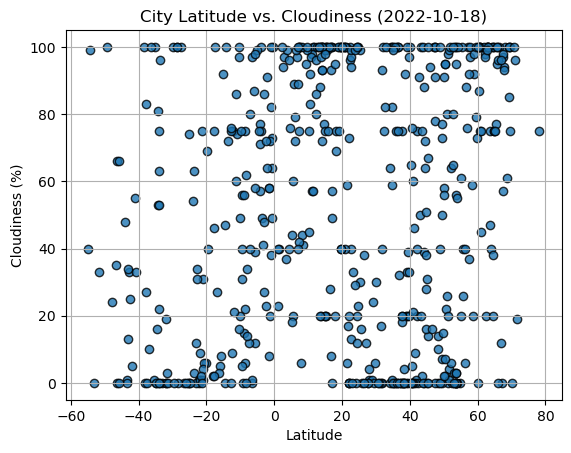

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

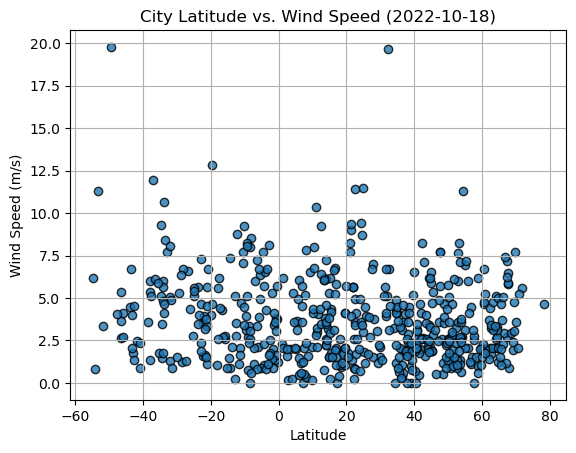

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line 
    regress_values = x_values * slope + intercept

    # Define line equation 
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Graph properties
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"R squared: {rvalue**2:.2f}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mukalla,14.5425,49.1242,28.71,73,77,3.15,YE,1724902737
2,cidade velha,14.9167,-23.6167,26.26,83,20,1.54,CV,1724902739
4,weno,7.4515,151.8468,28.97,84,100,2.06,FM,1724902742
5,tazovsky,67.4667,78.7000,11.78,86,57,2.69,RU,1724902743
8,hawaiian paradise park,19.5933,-154.9731,25.96,88,100,2.06,US,1724902746


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port lincoln,-34.7333,135.8667,21.39,50,0,9.29,AU,1724902738
3,puerto natales,-51.7236,-72.4875,2.85,87,33,3.35,CL,1724902740
6,alice springs,-23.7000,133.8833,33.75,13,3,5.66,AU,1724902744
7,adamstown,-25.0660,-130.1015,19.00,71,74,5.59,PN,1724902745
11,port-aux-francais,-49.3500,70.2167,6.44,96,100,19.78,TF,1724902751


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.58


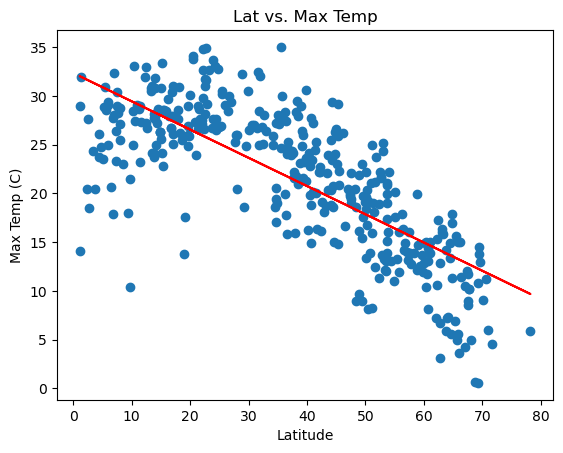

In [25]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                      "Lat vs. Max Temp",
                      "Latitude",
                       "Max Temp (C)",
                       (10, -20))

R squared: 0.52


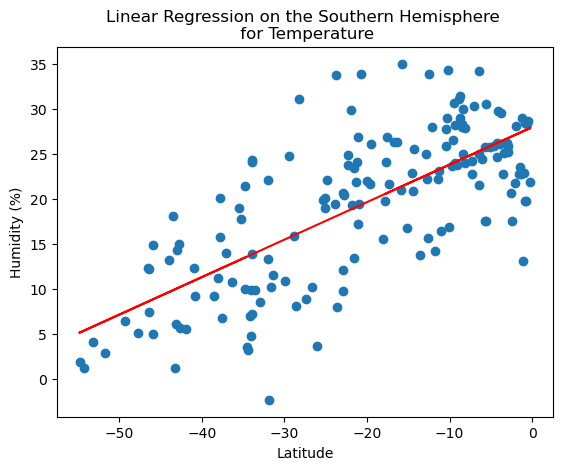

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                      "Linear Regression on the Southern Hemisphere \n for Temperature",
                      "Latitude",
                       "Humidity (%)",
                       (40, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.00


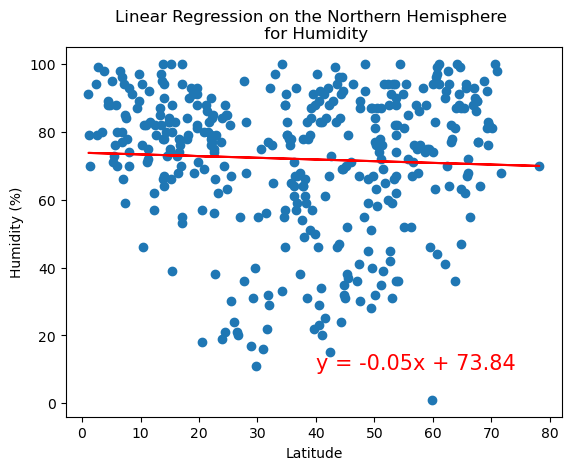

In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity",
                       "Latitude",
                       "Humidity (%)",
                       (40, 10))

R squared: 0.01


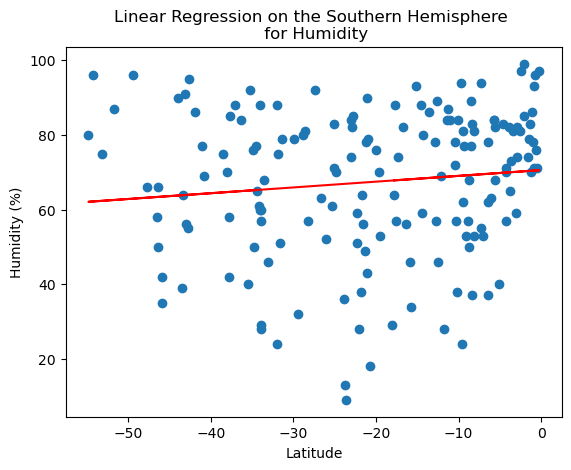

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity",
                       "Latitude",
                       "Humidity (%)",
                       (40, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.00


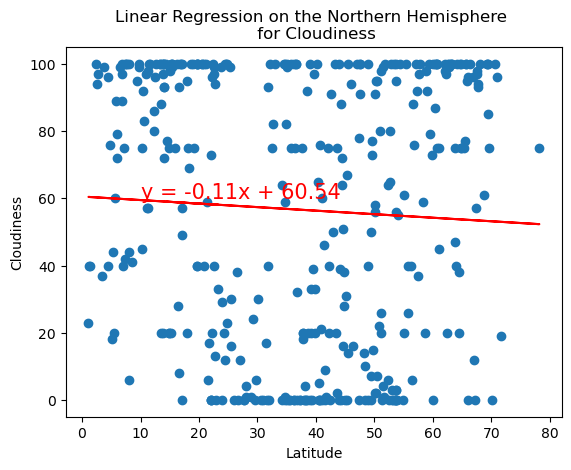

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Latitude",
                       "Cloudiness",
                       (10, 60))

R squared: 0.05


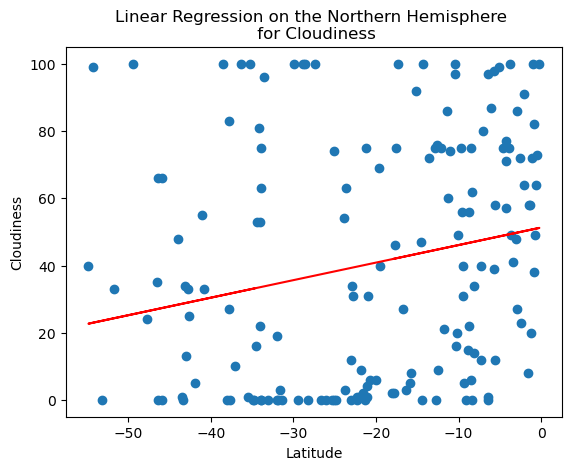

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Latitude",
                       "Cloudiness",
                       (10, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.00


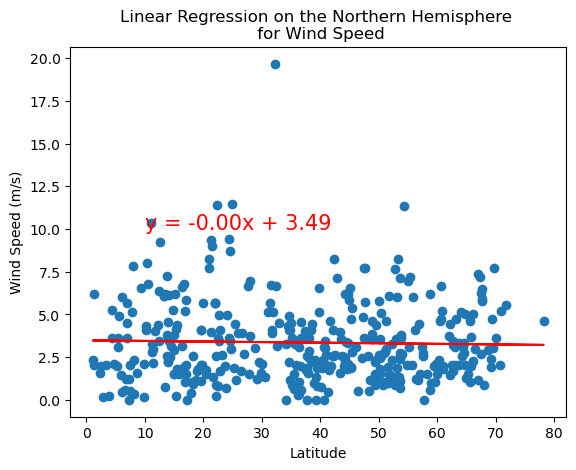

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Latitude",
                       "Wind Speed (m/s)",
                       (10, 10))

R squared: 0.03


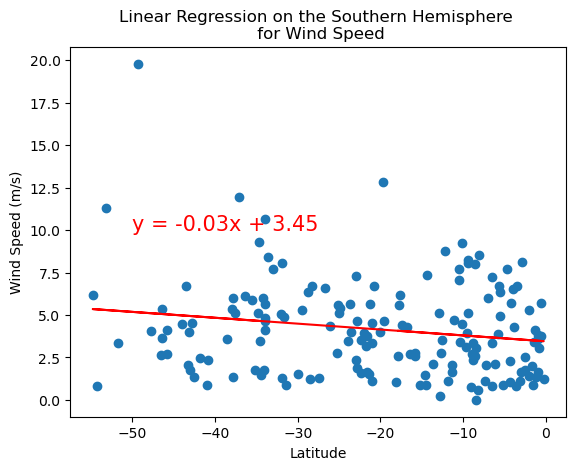

In [46]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Latitude",
                       "Wind Speed (m/s)",
                       (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE